### Benchmark the speed

Run the script below to get the estimate of fps you can achieve on your machine.
For this experiment we used ```timeit``` magic function.

/home/dpakhom1/anaconda2/lib/python2.7/site-packages/torch/nn/modules/module.py:360: UserWarning: src is not broadcastable to dst, but they have the same number of elements.  Falling back to deprecated pointwise behavior.
  own_state[name].copy_(param)
/home/dpakhom1/anaconda2/lib/python2.7/site-packages/torch/nn/functional.py:961: UserWarning: nn.functional.upsample_bilinear is deprecated. Use nn.functional.upsample instead.
  warnings.warn("nn.functional.upsample_bilinear is deprecated. Use nn.functional.upsample instead.")


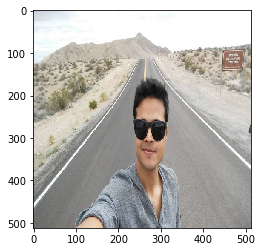

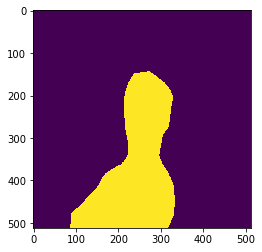

In [1]:
%matplotlib inline

import sys, os
sys.path.insert(0, '../../../../vision/')
sys.path.append('../../../../../pytorch-segmentation-detection/')

# Use second GPU -- change if you want to use a first one
os.environ["CUDA_VISIBLE_DEVICES"] = '3'

from PIL import Image
from matplotlib import pyplot as plt

import torch
from torchvision import transforms
from torch.autograd import Variable
import pytorch_segmentation_detection.models.fcn as fcn

import numpy as np


img_path = 'demo_img_vittal.jpg'

valid_transform = transforms.Compose(
                [
                     transforms.ToTensor(),
                     transforms.Normalize((0.485, 0.456, 0.406), (0.229, 0.224, 0.225))
                ])

img_not_preprocessed = Image.open(img_path).convert('RGB').resize((512, 512))

img = valid_transform(img_not_preprocessed)

img = img.unsqueeze(0)

img = Variable(img.cuda())

fcn = fcn.FCN_32s(num_classes=21)
fcn.load_state_dict(torch.load('fcn_32s_best.pth'))
fcn.cuda()
fcn.eval()

res = fcn(img)

_, tmp = res.squeeze(0).max(0)

segmentation = tmp.data.cpu().numpy().squeeze()

plt.imshow(img_not_preprocessed)
plt.show()

plt.imshow(segmentation)
plt.show()

In [2]:
def benchmark_fcn():
    
    img = valid_transform(img_not_preprocessed)

    img = img.unsqueeze(0)

    img = Variable(img.cuda())
    
    res = fcn(img)

In [3]:
img_not_preprocessed.size

(512, 512)

In [4]:
%%timeit 
# 50ms on a 512 by 512 image

benchmark_fcn()

10 loops, best of 3: 41.2 ms per loop
